# _Tasca 9, Sprint 7_ *Sampling Methods* 

## Level 1 
### Exercise 1

Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the mode, median, standard deviation, and arithmetic mean.

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

import os

pd.set_option('display.max_columns', None)

In [2]:
print(os.getcwd())

/Users/jalpa/Desktop/DataFun/Course_Generalitat/Notebooks


In [3]:
os.chdir("../Data/Football/")
os.listdir()

['la-liga.csv',
 'mensfootball_results.csv',
 'laliga_player_stats_spanish.csv',
 'La_Liga_Winners.csv.xls',
 'womensfootball_results.csv',
 'laliga_player_stats_english.csv']

In [4]:
sportsdata = pd.read_csv('laliga_player_stats_english.csv')
sportsdata.head(2)

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,Percentage of games started,Games where substituted,Percentage of games where substituted,Yellow Cards,Red Cards,Second Yellows,Goals scored,Penalties scored,Own goals,Goals conceded while player on pitch,Tackles,Interceptions,Recoveries,Clearances,Successful tackles,Unssuccessful tackles,Last man,Successful duels,Duels lost,Successful aerial challenges,Unsuccessful aerial challenges,Offsides,Fouls suffered,Fouls committed,Penalties won,Penalties given away,Handballs committed,Fouls committed per card,Shots,Shots on target,Assists,Successful dribbles,Unsuccessful dribbles,Goals scored.1,From inside the area,From outside the area,Goals with left foot,Goals with right foot,Penalties scored.1,Goals scored with header,Goals from set piece,Crosses,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.0,0,"0,0%",0,"0,0%",0,"0,0%",0,"0,0%",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.0,0,"0,0%",0,"0,0%",0,"0,0%",0,"0,0%",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0


In [5]:
sportsdata.shape

(556, 62)

In [6]:
sportsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Team                                   556 non-null    object 
 1   Position                               556 non-null    object 
 2   Shirt number                           526 non-null    float64
 3   Name                                   556 non-null    object 
 4   Minutes played                         556 non-null    float64
 5   Games played                           556 non-null    int64  
 6   Percentage of games played             556 non-null    object 
 7   Full games played                      556 non-null    int64  
 8   Percentage of full games played        556 non-null    object 
 9   Games started                          556 non-null    int64  
 10  Percentage of games started            556 non-null    object 
 11  Games 

#### Mode, median, standard deviation, and arithmetic mean
    
    - Mode: The most frequent observation in a sample.
    - Median: The value that lies in the middle when we sort the data.
    - Standard deviation: The measure of the amount of variation or dispersion of a set of values.
    - Arithmetic Mean: The total sum of the values (or observations) divided by the number of values.

In [7]:
import statistics

attr = 'Minutes played'
mode = statistics.mode(sportsdata[attr])
median = statistics.median(sportsdata[attr])
std = statistics.stdev(sportsdata[attr])
mean = statistics.mean(sportsdata[attr])

print('Statistics for ' + attr)
print(f'Mode: {mode:.4f}')
print(f'Median: {median:.4f}')
print(f'Standard Deviation: {std:.4f}')
print(f'Arithmatic Mean: {mean:.4f}')

Statistics for Minutes played
Mode: 0.0000
Median: 2.4130
Standard Deviation: 239.6651
Arithmatic Mean: 125.8636


In [8]:
from collections import Counter
def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

print('Manually calculated Mode', my_mode(sportsdata[attr]))

Manually calculated Mode [0.0]


## Level 2
### Exercises 2

Continuing with the sports topic data, select two attributes and calculate their correlation.

In [15]:
col1 = 'Games played'
col2 = 'Goals scored'
correlation = sportsdata[col1].corr(sportsdata[col2])
print(f'Correlation between Games played and Goals scores is {correlation:.4f}')

Correlation between Games played and Goals scores is 0.4591


## Level 3
### Exercises 3

Continuing with the sports theme data, calculate the correlation of all attributes with each other and represent them in a matrix with different intensity colors.

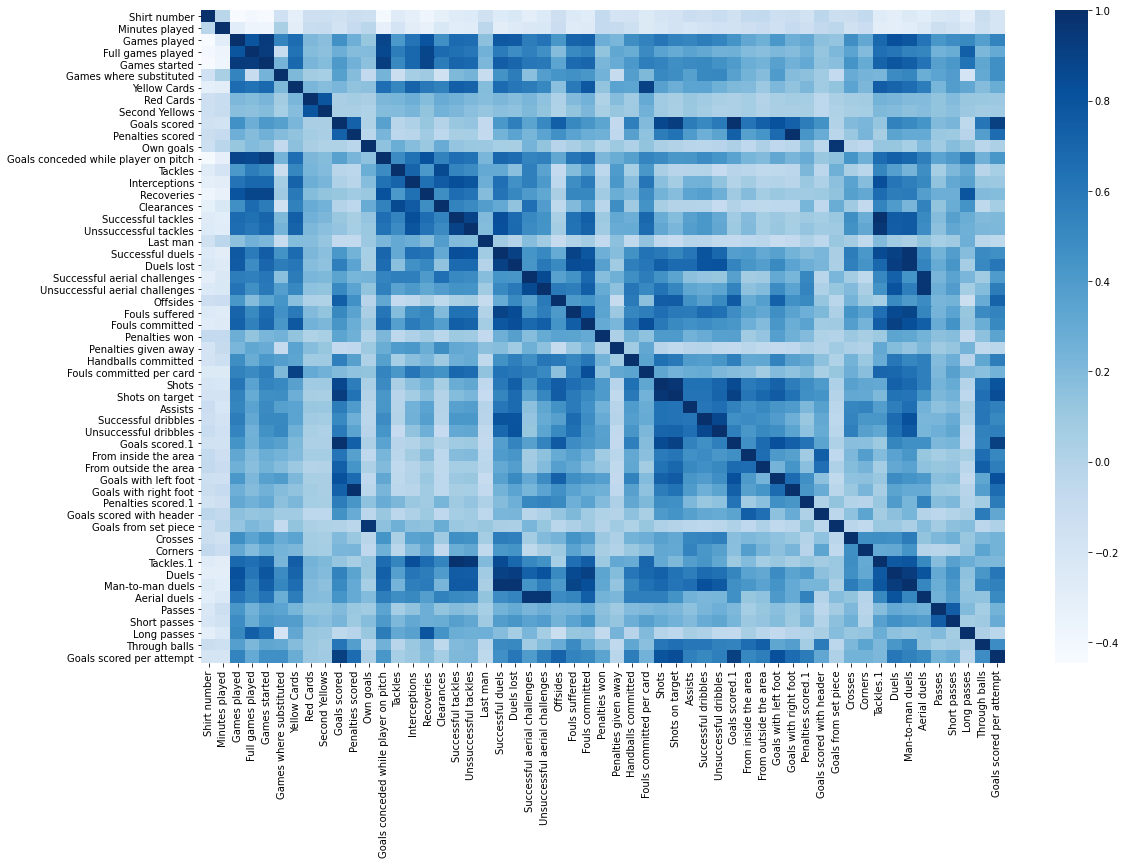

In [10]:
plt.figure(figsize=(18,12))
correlation_mat = sportsdata.corr()

sns.heatmap(correlation_mat, cmap='Blues')

plt.show()

## Level 3
###  Exercises 4
Continuing with the sports theme data, select an attribute and calculate the geometric mean and harmonic mean.

In [11]:
def geometric_mean(values):
    return float(np.prod([x for x in values])) ** (1 / len([x for x in values]))

cols = ['Minutes played']
for col in cols:
    # exclude 0s from being passed to the function
    gmean = geometric_mean(sportsdata.loc[sportsdata[col] >= 0, col])
    
print('Geometric Mean of \'Minutes played\' is', gmean)

Geometric Mean of 'Minutes played' is 0.0


In [12]:
#gmean = statistics.geometric_mean(sportsdata['Minutes played'])
#print('Harmonic Mean of \'Minutes played\' is', gmean)
hmean = statistics.harmonic_mean(sportsdata['Minutes played'])
print('Harmonic Mean of \'Minutes played\' is', hmean)

Harmonic Mean of 'Minutes played' is 0
